# Implement Your Machine Learning Project Plan

In this lab you will implement the machine learning project plan you created in the assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Create features and a label, and prepare your data for your model.
3. Fit your model to the training data and evaluate your model. 
4. Show how you've improved upon your baseline model.

### Import Packages

Before you get started, import a few packages.

In [15]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import the additional packages that you will need for this task (only import packages that you have used in this course).

In [16]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Part 1: Load the Data Set


You have chosen to work with one of three data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultDataFull.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is location in file `WHR2018Chapter2OnlineData.csv`

<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [17]:
# YOUR CODE HERE
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
df = pd.read_csv(WHRDataSet_filename, header=0)

df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


## Part 2: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

### Baseline: 62.249887

In [26]:
df_small = df[['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth']]
df_small = df_small.dropna()

In [27]:
y = df_small['Healthy life expectancy at birth']
X = df_small[['Life Ladder', 'Log GDP per capita', 'Social support']]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

### Random Forests (Mariam)

In [29]:
rf_model = RandomForestRegressor()

In [33]:
param_grid = {'max_depth': [4,8,16,32],
         'n_estimators': [100, 200, 300, 400]}
grid = GridSearchCV(rf_model, param_grid, cv=5)
grid_search = grid.fit(X_train, y_train)
best_depth = grid_search.best_params_['max_depth']
best_est = grid_search.best_params_['n_estimators']
print(best_depth, best_est)

8 200


In [34]:
rf_model_best = RandomForestRegressor(max_depth=best_depth, n_estimators=best_est)
rf_model_best.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
y_rf_pred = rf_model_best.predict(X_test)
rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)
rf_r2 = r2_score(y_test, y_rf_pred)
print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))

[RF] Root Mean Squared Error: 3.6453969168530214
[RF] R2: 0.8045654618717493


### Model Performances:
#### Random Forests
**rmse:** 3.6453969168530214

**r2:** 0.8045654618717493

#### Linear Regression
**rmse:** 3.9310584613272437

**r2:** 0.7727359834073003

#### GBDT
**rmse:** 3.695806303880558

**r2:** 0.7991230634015936

#### Decision Trees
**rmse:** 5.700762135407992

**r2:** 0.520458181732911

### Analysis

#### Graphs

In [37]:
lr_rmse = 3.9310584613272437
dt_rmse = 5.700762135407992
gbdt_rmse = 3.695806303880558

lr_r2 = 0.7727359834073003 
dt_r2 = 0.520458181732911
gbdt_r2 = 0.7991230634015936

In [38]:
RMSE_Results = [lr_rmse, dt_rmse, gbdt_rmse, rf_rmse]
R2_Results = [lr_r2, dt_r2, gbdt_r2, rf_r2]

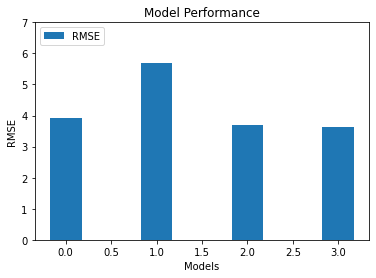

In [44]:
rg = np.arange(4)
width = 0.35
labels = ['LR', 'DT', 'GBDT', 'RF']

plt.bar(rg, RMSE_Results, width, label="RMSE")


plt.xlabel("Models")
plt.ylabel("RMSE")

plt.ylim([0,7])
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

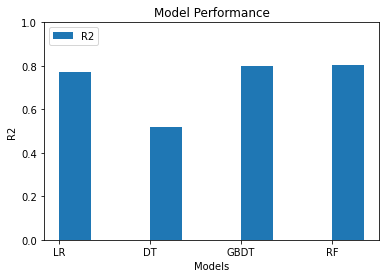

In [45]:
plt.bar(rg+width, R2_Results, width, label='R2')
plt.xticks(rg + width/2, labels)

plt.xlabel("Models")
plt.ylabel("R2")

plt.ylim([0,1])
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

#### General Summary
From the data shown, it seems like Random Forests would be the best model to use to predict a Healthy Life Expectancy with GBDT being a close second.